In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

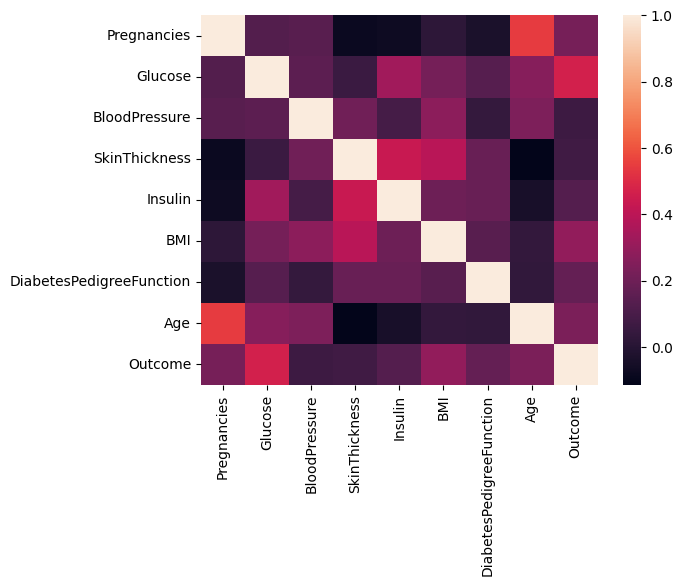

In [7]:
sns.heatmap(df.corr())

The most effecting thing to diabeties are Glucose and then BMI ... etc

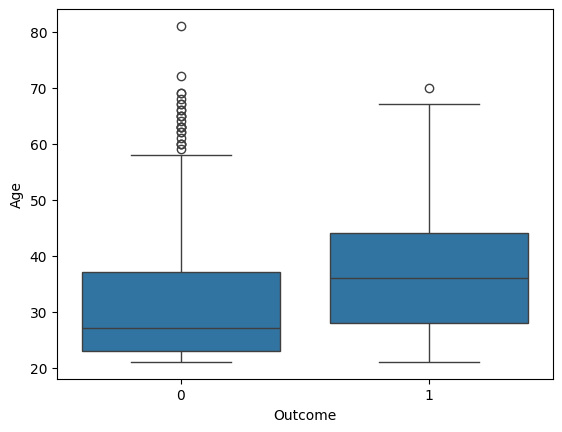

In [8]:
sns.boxplot(x='Outcome', y='Age', data=df)
plt.show()


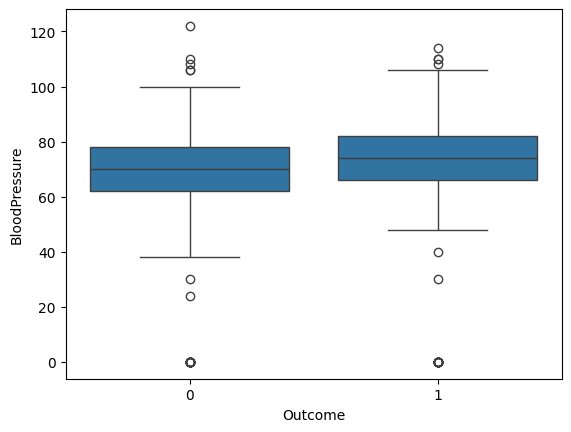

In [9]:
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.show()


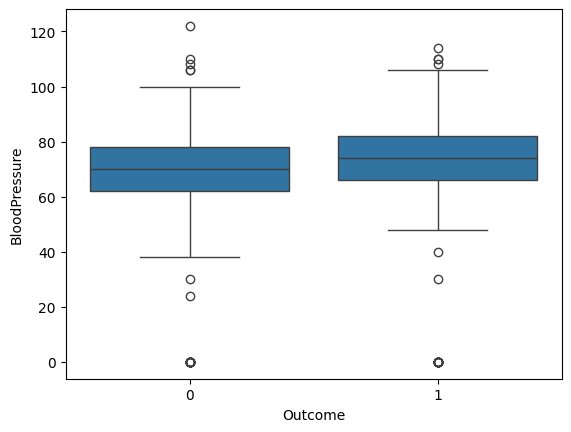

In [10]:
sns.boxplot(x='Outcome', y='BloodPressure', data=df)
plt.show()


In [11]:
df.shape

(768, 9)

In [12]:
for col in df.columns:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [13]:
df.shape

(636, 9)

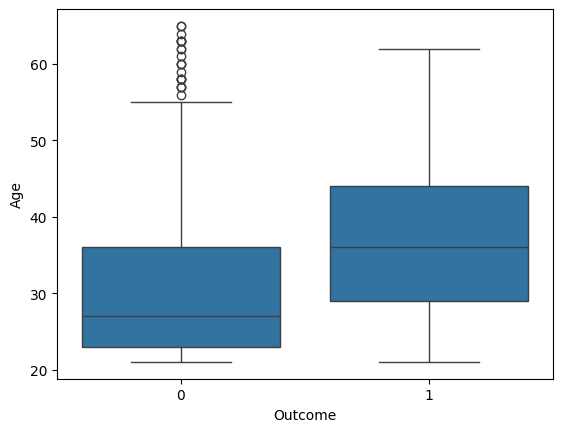

In [14]:
sns.boxplot(x='Outcome', y='Age', data=df)
plt.show()

In [15]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.273349,109.293850,70.712984,20.312073,62.601367,30.817768,0.398658,30.610478
1,4.928934,140.208122,74.893401,21.710660,83.314721,34.518782,0.487695,36.888325


In [16]:
y=df['Outcome']
X=df.drop('Outcome',axis=1)

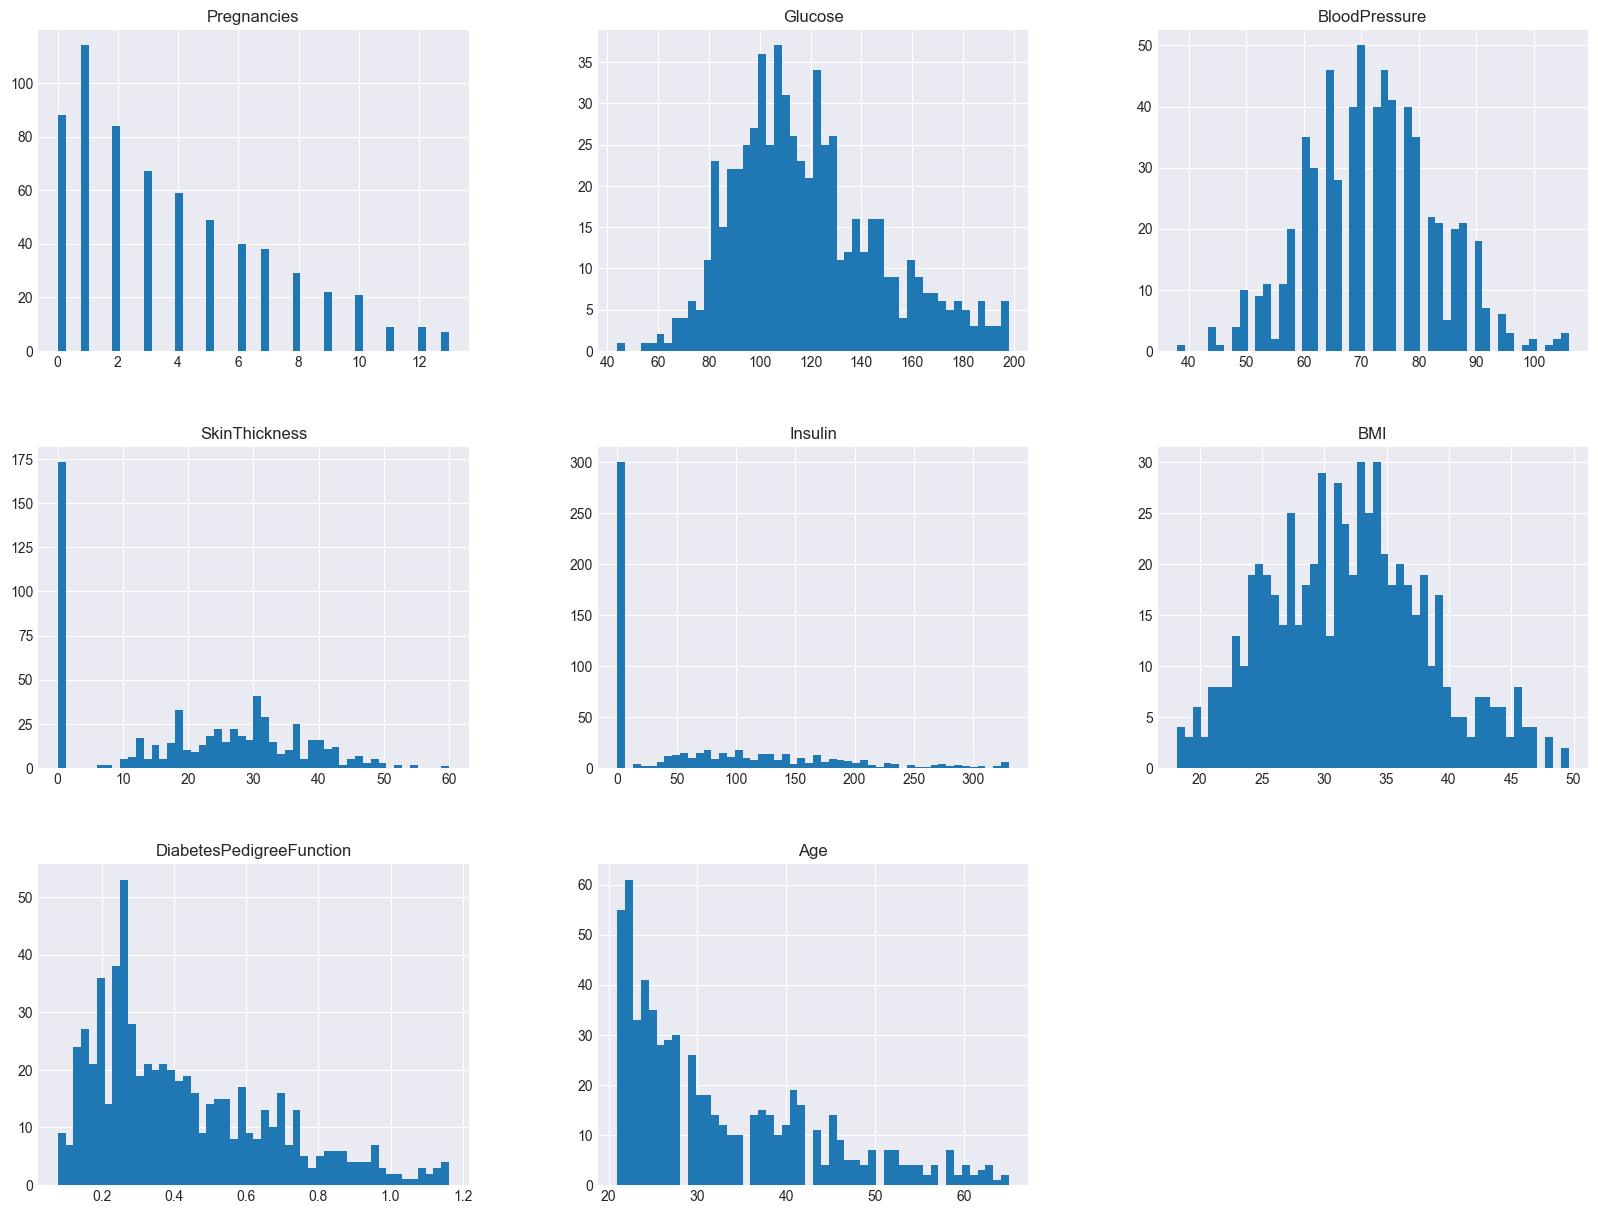

In [17]:
## Plot desnity plot for all features
plt.style.use('seaborn-v0_8-darkgrid')
X.hist(bins=50,figsize=(20,15))
plt.show()

In [18]:

skewed_features = ['Pregnancies', 'Insulin', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age']


print("\n--- Step 2: Applying Log Transformation ---")
for col in skewed_features:
    X[col] = np.log1p(X[col])
    print(f"Applied log(x+1) transformation to '{col}'")

print("\n--- Cleaning and Transformation Complete ---")


--- Step 2: Applying Log Transformation ---
Applied log(x+1) transformation to 'Pregnancies'
Applied log(x+1) transformation to 'Insulin'
Applied log(x+1) transformation to 'SkinThickness'
Applied log(x+1) transformation to 'DiabetesPedigreeFunction'
Applied log(x+1) transformation to 'Age'

--- Cleaning and Transformation Complete ---


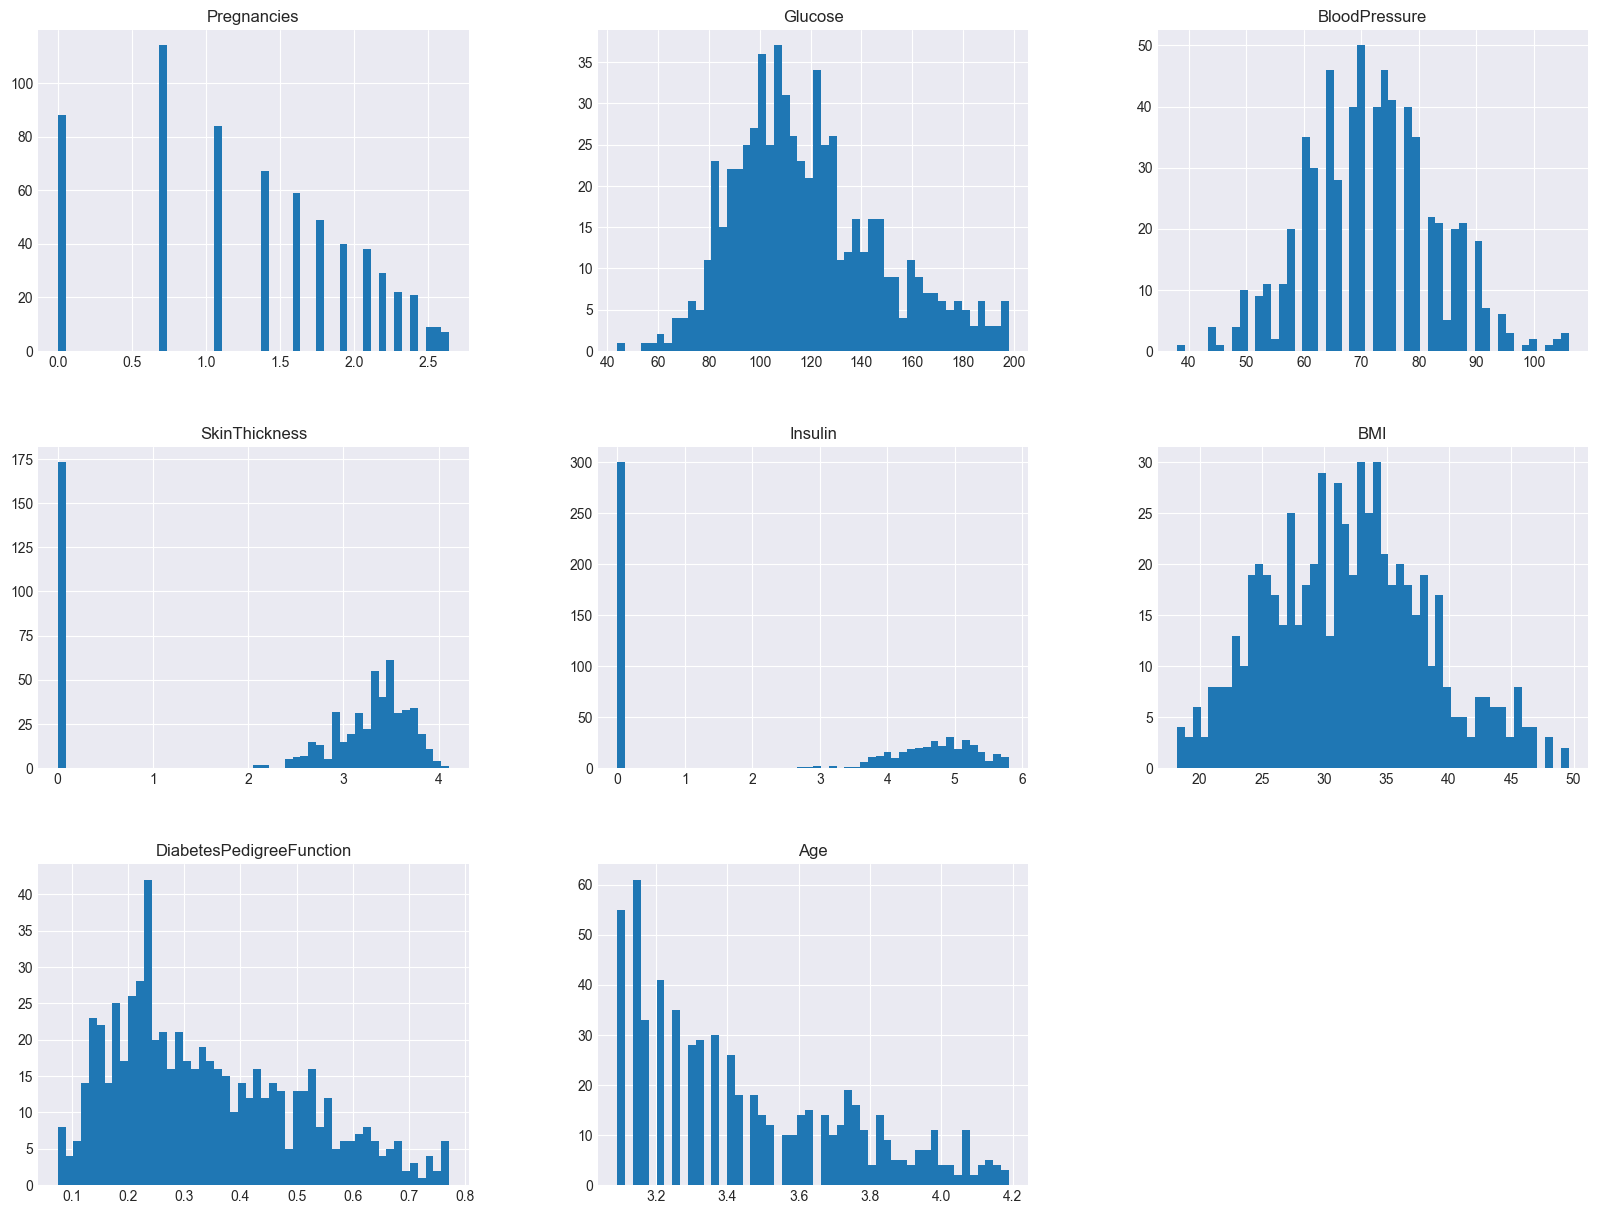

In [20]:
plt.style.use('seaborn-v0_8-darkgrid')
X.hist(bins=50,figsize=(20,15))
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=42)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(636, 8) (508, 8) (128, 8)


In [26]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [44]:
from sklearn import svm
from sklearn.metrics import accuracy_score
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [45]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7933070866141733


In [47]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8046875


Making a Predictive System

In [48]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 4.93421052e+00  1.63358141e+00 -5.17500287e-03  1.10438261e+01
   7.22393468e+01 -9.68927568e-01  1.49782847e+00  1.58970388e+02]]
[1]
The person is diabetic


/Volumes/Extreme_SSD/MachineLearning/miniconda/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
